In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
from sklearn.decomposition import TruncatedSVD
print("success")

success


# Mount google drive

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load train and validation data from Facebook HMD dataset

In [89]:
folder_path_train ="/content/drive/MyDrive/Colab Notebooks/Sabudh_workshop(NOV_2022)/text_classification/train.jsonl"
folder_path_dev ="/content/drive/MyDrive/Colab Notebooks/Sabudh_workshop(NOV_2022)/text_classification/dev.jsonl"
df_train = pd.read_json(folder_path_train,lines=True)
df_dev=pd.read_json(folder_path_dev,lines=True)

print(df_train.tail())

         id            img  label  \
8495  10423  img/10423.png      1   
8496  98203  img/98203.png      1   
8497  36947  img/36947.png      1   
8498  16492  img/16492.png      1   
8499  15937  img/15937.png      1   

                                                   text  
8495                  nobody wants to hang auschwitz me  
8496  when god grants you a child after 20 years of ...  
8497  gays on social media: equality! body positivit...  
8498  having a bad day? you could be a siamese twin ...  
8499  i hate muslims too they take their religion to...  


# check distribution of data in train and validation dataset

Distribution of training dataset
 0    5450
1    3050
Name: label, dtype: int64 

Distribution of validation dataset
 1    250
0    250
Name: label, dtype: int64


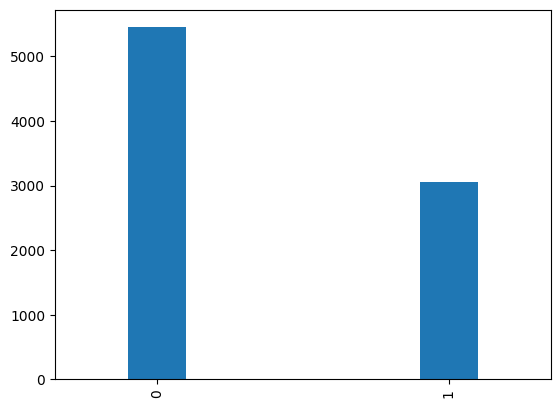

In [90]:
# distribution of movies based on certificate
df_train['label'].value_counts().plot.bar(width=0.2)

print('Distribution of training dataset\n',df_train.label.value_counts(),"\n")
print("Distribution of validation dataset\n",df_dev.label.value_counts())

# Check null values

In [91]:
print(df_train.isna().sum())

print("\n\n",df_dev.isna().sum())

id       0
img      0
label    0
text     0
dtype: int64


 id       0
img      0
label    0
text     0
dtype: int64


# load pretrained word embedding model from gensim library

In [92]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


# download and save model to drive

In [216]:
import gensim.downloader as api
wv=api.load('glove-twitter-25')



[==================================================] 100.0% 104.8/104.8MB downloaded


In [217]:
wv.save('/content/drive/MyDrive/Colab Notebooks/Sabudh_workshop(NOV_2022)/text_classification/glove_twitter_25.kv')

# Use saved model from drive

# word to vector conversion using gensim 'word2vec-google-news-300' model

In [218]:
from gensim.models import KeyedVectors
wv=KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/Sabudh_workshop(NOV_2022)/text_classification/glove_twitter_25.kv')

w=wv["good"]
print(w)
print("\n\nlength of word vector",len(w))

print("\n\n type of word vector model ",type(wv))
print("\n\n word vector type",type(w))

[-0.54403   0.60274  -0.14543  -0.023398 -0.13771   0.60137   2.192
  0.20804  -0.51536  -0.23101  -0.80387   0.56901  -5.0234    0.26507
  0.47891  -0.59854   0.56132  -1.0905   -0.52587   0.12506  -0.22624
  0.24529  -0.45767   0.92619   0.022125]


length of word vector 25


 type of word vector model  <class 'gensim.models.keyedvectors.KeyedVectors'>


 word vector type <class 'numpy.ndarray'>


# Import spacy library for text preprocessing

In [219]:
data=df_train
data.head()

,id,img,label,text,processed_text,text_vector
0,42953,img/42953.png,0,its their character not their color that matters,"[character, color, matter]","[0.09035491943359375, 0.0335693359375, 0.02724..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[afraid, love, like, ex]","[0.099072265625, 0.0517578125, 0.0374908447265..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, pet]","[0.00667572021484375, 0.103271484375, -0.07925..."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[love, everybody, squirrel, hate, squirrel]","[0.008382161458333334, -0.041015625, -0.082366..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, hit...","[-0.03386579241071429, -0.08760288783482142, 0..."


# use sapcy 'en_core_web_sm" model for preporocessing

In [220]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_sm")

# tokenize each word in a sentence and apply lemmatization on it, remove punctuation, space, brackets if any

In [237]:

def preprocess(text):
  doc=nlp(text)
  filtered_token=[]

  for token in doc:
  
    if token.is_punct or token.is_space or token.is_bracket:
      continue
    else:
      token=token.lemma_
     
      filtered_token.append(token)
  return filtered_token
  


# example showing text preprocessing 

In [238]:
tokens=preprocess("My best friend Anu, (who is three months older than me) is coming to my house tonight!!!.")
tokens

['my',
 'good',
 'friend',
 'Anu',
 'who',
 'be',
 'three',
 'month',
 'old',
 'than',
 'I',
 'be',
 'come',
 'to',
 'my',
 'house',
 'tonight']

# Apply preprocessing on the text column of training dataset

In [239]:

data['processed_text']=data['text'].apply(lambda x: preprocess(x))

data


,id,img,label,text,processed_text,text_vector
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha...","[0.12340250611305237, -0.4694550186395645, -0...."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon...","[-0.019239196181297304, 0.1286021962761879, 0...."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]","[-0.39793750643730164, 0.11350800399668515, 0...."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[I, love, everything, and, everybody, except, ...","[-0.5873133540153503, 0.26603517929712933, 0.3..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve...","[-0.27294571484838215, 0.1273972945553916, 0.3..."
...,...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,"[nobody, want, to, hang, auschwitz, I]","[-0.1600250042974949, 0.24999574851244688, 0.0..."
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,"[when, god, grant, you, a, child, after, 20, y...","[-0.20496760345995427, 0.45759720653295516, -0..."
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,"[gay, on, social, medium, equality, body, posi...","[-0.13869293592870235, -0.017729184590280056, ..."
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,"[have, a, bad, day, you, could, be, a, siamese...","[-0.27228490940549155, 0.29340984498743305, 0...."


# use gensim pretrained model to vectorize each token in the preprocessed text and take the average of vectors to keep the dimension same

In [225]:
import numpy as np

def gensim_vector(token):
  vec_size=wv.vector_size
  wv_final=np.zeros(vec_size) # take a vector consisting '0s' having size of wv

  count=1
  for t in token:
    if t in wv:
      count += 1
      wv_final += wv[t] # vectorize word and add to previous value

  return wv_final/count # take the average


# Apply the vectorization process on processed text column of the training dataset

In [227]:
text_vector = data["processed_text"].apply(gensim_vector)
data["text_vector"]=text_vector
#data["text_vector"]=data["processed_text"].apply(gensim_vector)
data.head()

,id,img,label,text,processed_text,text_vector
0,42953,img/42953.png,0,its their character not their color that matters,"[character, color, matter]","[0.12340250611305237, -0.4694550186395645, -0...."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[afraid, love, like, ex]","[-0.019239196181297304, 0.1286021962761879, 0...."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, pet]","[-0.39793750643730164, 0.11350800399668515, 0...."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[love, everybody, squirrel, hate, squirrel]","[-0.5873133540153503, 0.26603517929712933, 0.3..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, hit...","[-0.27294571484838215, 0.1273972945553916, 0.3..."


In [229]:
len(data.text_vector.iloc[0])

25

# Save data to a csv file

In [117]:
data.to_csv("text_vec_300.csv",index=False)

# EDA for word embedding


# Prepare data for Box plot

In [228]:
# class label 1
val1=data[data.label==1].text_vector
val1=val1.reset_index().drop(['index'],axis=1)


l=len(val1.text_vector.iloc[0])
val1_new=val1.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val1)):
  b=val1.text_vector.iloc[i].reshape(1,l)
  val1_new=np.append(val1_new,b,axis=0)
print(val1_new.shape) # get a numpy array of dim nx300, n=(samlples with label 1)

# class label 0
val2=data[data.label==0].text_vector
val2=val2.reset_index().drop(['index'],axis=1)

val2_new=val2.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val2)):
  b=val2.text_vector.iloc[i].reshape(1,l)
  val2_new=np.append(val2_new,b,axis=0)
print(val2_new.shape)# get a numpy array of dim mx300,m=(samlples with label 0)


(3050, 25)
(5450, 25)


Text(0.5, 0, 'Feature dimension')

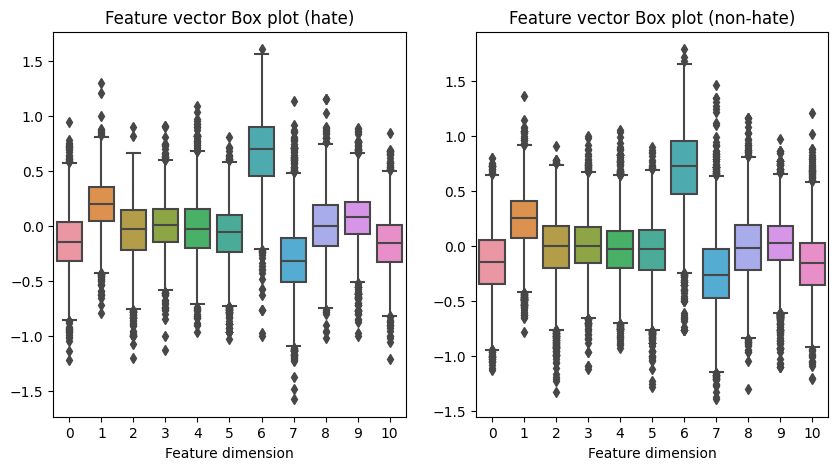

In [234]:
a=val1_new[:,0:11]
b=val2_new[:,0:11]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=a)
plt.title("Feature vector Box plot (hate)")
plt.xlabel('Feature dimension')

plt.subplot(1,2,2)
sns.boxplot(data=b)
plt.title("Feature vector Box plot (non-hate)")
plt.xlabel('Feature dimension')



# Use PCA for dimension reduction to visualize high dimension feature

In [235]:

def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['black', 'red']
        
    plt.scatter(scores[:, 0], scores[:, 1], s = 6, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'black', label = 'non hate')
    blue_patch = mpatches.Patch(color = 'red', label = 'hate')
   
    plt.legend(handles = [red_patch, blue_patch], prop = {"size": 12})


# Feature distribution for hate and non hate text and dimensionality reduction

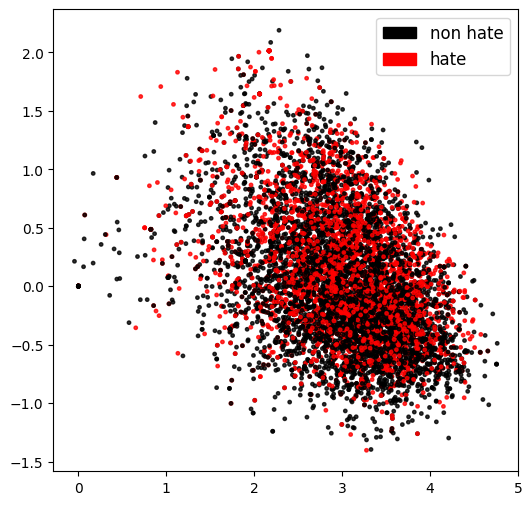

In [240]:
x= np.stack(text_vector)
y=data.label

fig = plt.figure(figsize = (6, 6))          
plot_embedding(x,y)
plt.show()
